In [4]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np


In [5]:
data_path = '/workspaces/EWT/EWT4/DATA/ETW4.ods'
df_E_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet11", skiprows=36)
df_E_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_E_MCT1_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_MCT1_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet16", skiprows=36)

E_MCT1_ilacco1_0 = dataframe1(df_E_MCT1_ilacco1_0,3,5,6,7)
E_MCT1_ilacco1_0_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_0_50μM_CCCP,3,8,9,10)
E_MCT1_ilacco1_1 = dataframe1(df_E_MCT1_ilacco1_1,3,5,6,7)
E_MCT1_ilacco1_2 = dataframe1(df_E_MCT1_ilacco1_2,3,5,6,7)
E_MCT1_ilacco1_1_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
print(E_MCT1_ilacco1_0)

     Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0     0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1    10.0  -0.021960  -0.034363  -0.047001    -0.034441            0.012521
2    20.0  -0.029753  -0.052886  -0.071809    -0.051483            0.021063
3    30.0  -0.026413  -0.064880  -0.088356    -0.059883            0.031272
4    40.0  -0.028862  -0.083380  -0.110180    -0.074141            0.041438
5    50.0  -0.034429  -0.094165  -0.131387    -0.086660            0.048913
6    60.0  -0.046870  -0.114744  -0.164332    -0.108649            0.058968
7    70.0  -0.055359  -0.122869  -0.181421    -0.119883            0.063084
8    80.0  -0.065574  -0.135516  -0.199965    -0.133685            0.067215
9    90.0  -0.067633  -0.144657  -0.216266    -0.142852            0.074333
10  100.0  -0.083582  -0.152371  -0.237645    -0.157866            0.077179
11  110.0  -0.096106  -0.166252  -0.259445    -0.173934            0.081940
12  120.0  -

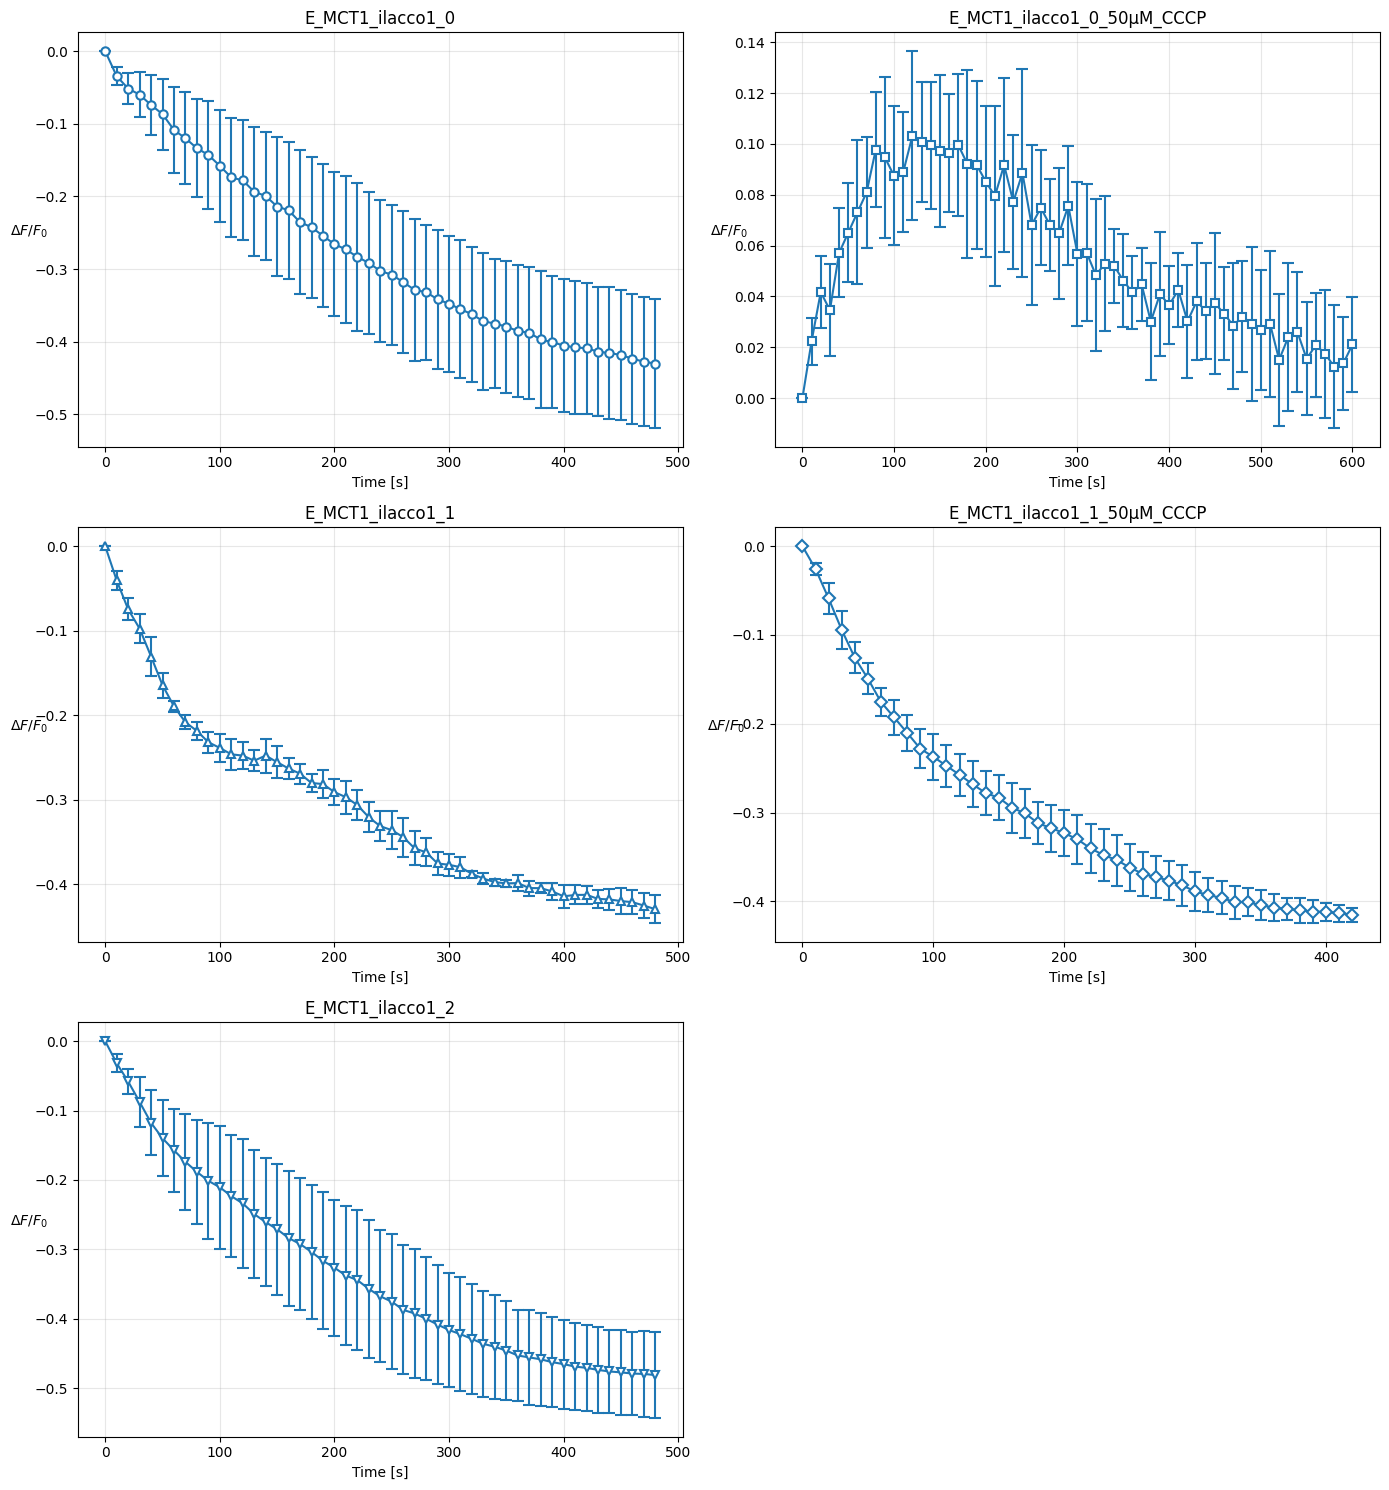

Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png
Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png


In [6]:
# Erstelle Subplots für alle `E_MCT1_ilacco1_*` DataFrames (verwende feste Spalten: 'Time','Mittelwerte','Standartabweichung')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

# Verschiedene Marker für jede Kurve
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Bestimme Grid-Größe
n = len(frames)
cols = 2
rows = (n + cols - 1) // cols if n>0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for ax in axes[n:]:
    ax.axis('off')

for i, ((name, df), ax) in enumerate(zip(frames, axes)):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Erwartete Spalten: 'Time', 'Mittelwerte'
    if 'Time' not in df.columns or 'Mittelwerte' not in df.columns:
        ax.text(0.5, 0.5, "Erwartete Spalten 'Time' oder 'Mittelwerte' fehlen", ha='center', va='center')
        ax.set_title(name)
        print(f"{name}: Fehlende Spalten. Vorhandene Spalten: {df.columns.tolist()}")
        continue

    times = pd.to_numeric(df['Time'], errors='coerce')
    means = pd.to_numeric(df['Mittelwerte'], errors='coerce')

    # Std-Spalte: bevorzugt 'Standartabweichung', fallback auf 'Standardabweichung'
    if 'Standartabweichung' in df.columns:
        stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
    elif 'Standardabweichung' in df.columns:
        stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
    else:
        stds = np.zeros_like(means)

    mask = (~times.isna()) & (~means.isna())
    if mask.sum() == 0:
        ax.text(0.5, 0.5, 'Keine gültigen Daten zum Plotten', ha='center', va='center')
    marker = markers[i % len(markers)]
    ax.errorbar(times[mask], means[mask], yerr=stds[mask], 
                marker=marker, linestyle='-', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'Efflux_all_subplots.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f'Saved combined Efflux subplot: {outpath}')
print(f'Saved combined Efflux subplot: {outpath}')
plt.show()

Saved combined overlay plot: ../figueres/Efflux_combined_overlay.png


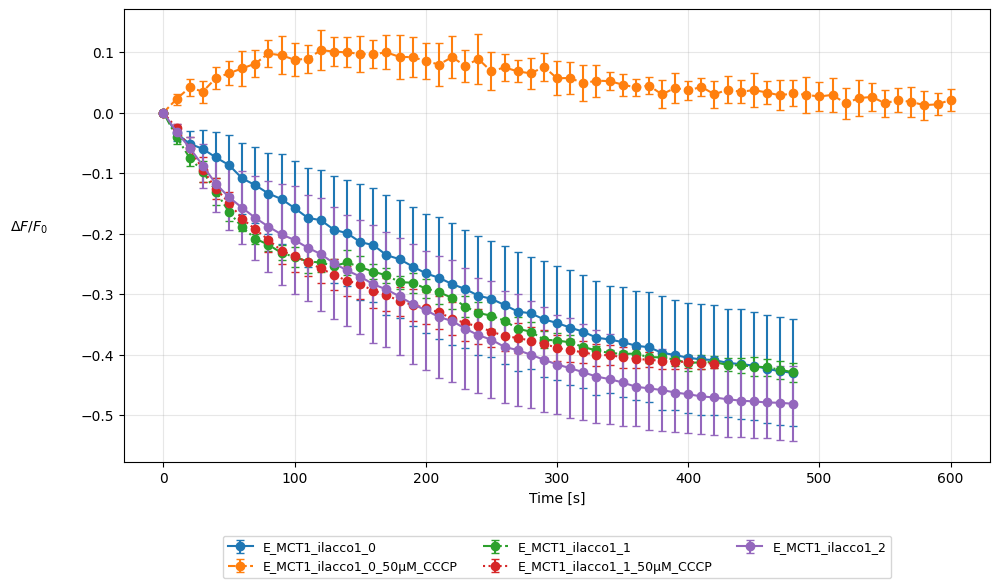

In [7]:
# Kombiniere alle `E_MCT1_ilacco1_*` DataFrames in einem Overlay-Plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

# Farben/linestyles
linestyles = ['-', '--', '-.', ':']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

plt.figure(figsize=(10,6))
ax = plt.gca()
plotted = False

for idx, (name, df) in enumerate(frames):
    ls = linestyles[idx % len(linestyles)]
    color = colors[idx % len(colors)]
    if df is None:
        print(f"Variable {name} nicht gefunden — überspringe.")
        continue

    # Finde Time
    if 'Time' in df.columns:
        times = pd.to_numeric(df['Time'], errors='coerce')
    else:
        times = pd.to_numeric(df.iloc[:,0], errors='coerce')

    # Verwende generische 'Mittelwerte' Spalte
    if 'Mittelwerte' in df.columns:
        means = pd.to_numeric(df['Mittelwerte'], errors='coerce')
        if 'Standartabweichung' in df.columns:
            stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
        elif 'Standardabweichung' in df.columns:
            stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
        else:
            stds = np.zeros_like(means)

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            continue
        ax.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o'+ls, color=color, label=name, capsize=3)
        plotted = True
    else:
        print(f"{name}: Spalte 'Mittelwerte' nicht gefunden, überspringe.")

if not plotted:
    print('Keine Daten geplottet (keine passenden Spalten).')
else:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.yaxis.set_label_coords(-0.11, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize=9)
    plt.tight_layout()
    outpath = os.path.join('..', 'figueres', 'Efflux_combined_overlay.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved combined overlay plot: {outpath}')
    plt.show()

Saved plot: ../figueres/E_MCT1_ilacco1_1_50μM_CCCP_plot.png


/tmp/ipykernel_3150/3393381839.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)


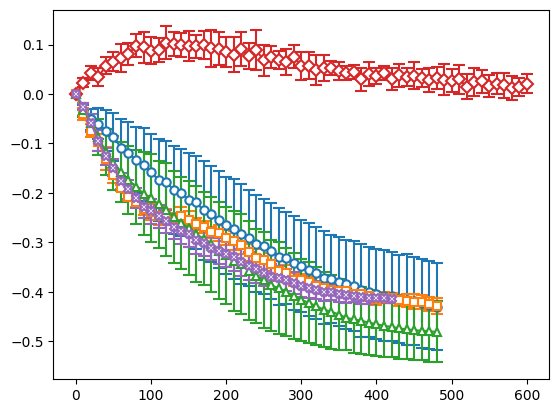

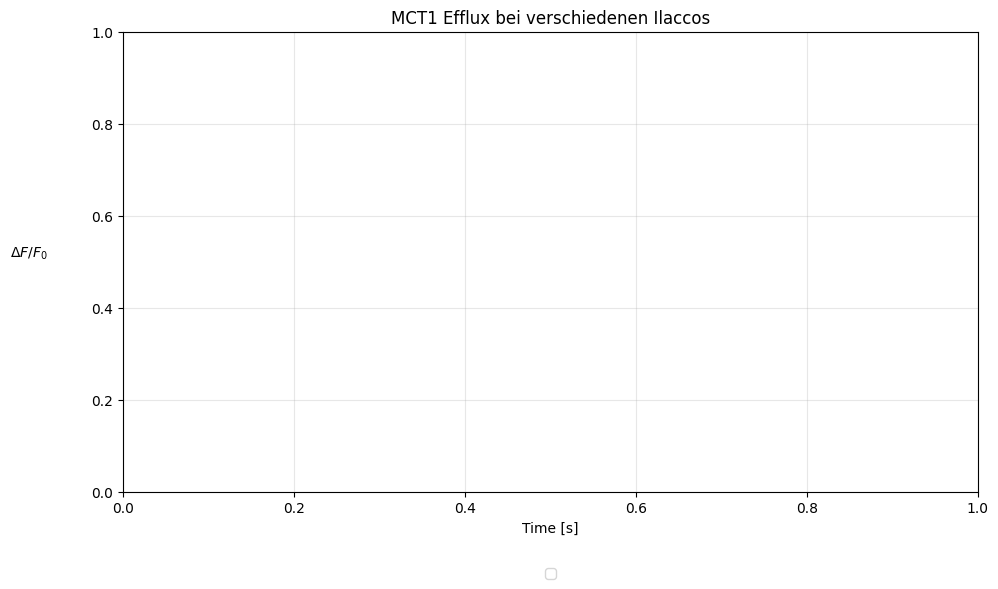

In [ ]:
# verschiedene Ilaccos Efflux

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_0_50μM_CCCP",'D', E_MCT1_ilacco1_0_50μM_CCCP),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

for name,marker, df in data_frames:
    plt.errorbar(df["Time"], df["Mittelwerte"], yerr=df["Standardabweichung"], 
                    marker=marker, linestyle='-', label=name, capsize=4, 
                    markerfacecolor='white', markeredgewidth=1.5, markersize=6)
plotted_any = True
plt.figure(figsize=(10,6))
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
plt.title("MCT1 Efflux bei verschiedenen Ilaccos")
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', f'{name}_plot.png')
#plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()

E_MCT1_ilacco1_0:
  A = 0.5426 ± 0.0061
  k = 0.0032 ± 0.0001
  C = -0.5515 ± 0.0071

E_MCT1_ilacco1_1:
  A = 0.4130 ± 0.0104
  k = 0.0053 ± 0.0004
  C = -0.4563 ± 0.0115

E_MCT1_ilacco1_2:
  A = 0.5352 ± 0.0055
  k = 0.0045 ± 0.0001
  C = -0.5527 ± 0.0065

E_MCT1_ilacco1_0_50μM_CCCP:
  A = -0.0595 ± 0.0277
  k = 0.0702 ± 0.0648
  C = 0.0566 ± 0.0038

E_MCT1_ilacco1_1_50μM_CCCP:
  A = 0.4228 ± 0.0045
  k = 0.0073 ± 0.0002
  C = -0.4330 ± 0.0041

E_MCT1_ilacco1_2:
  A = 0.5352 ± 0.0055
  k = 0.0045 ± 0.0001
  C = -0.5527 ± 0.0065

E_MCT1_ilacco1_0_50μM_CCCP:
  A = -0.0595 ± 0.0277
  k = 0.0702 ± 0.0648
  C = 0.0566 ± 0.0038

E_MCT1_ilacco1_1_50μM_CCCP:
  A = 0.4228 ± 0.0045
  k = 0.0073 ± 0.0002
  C = -0.4330 ± 0.0041



Saved plot: ../figueres/Efflux_exponential_fit.png


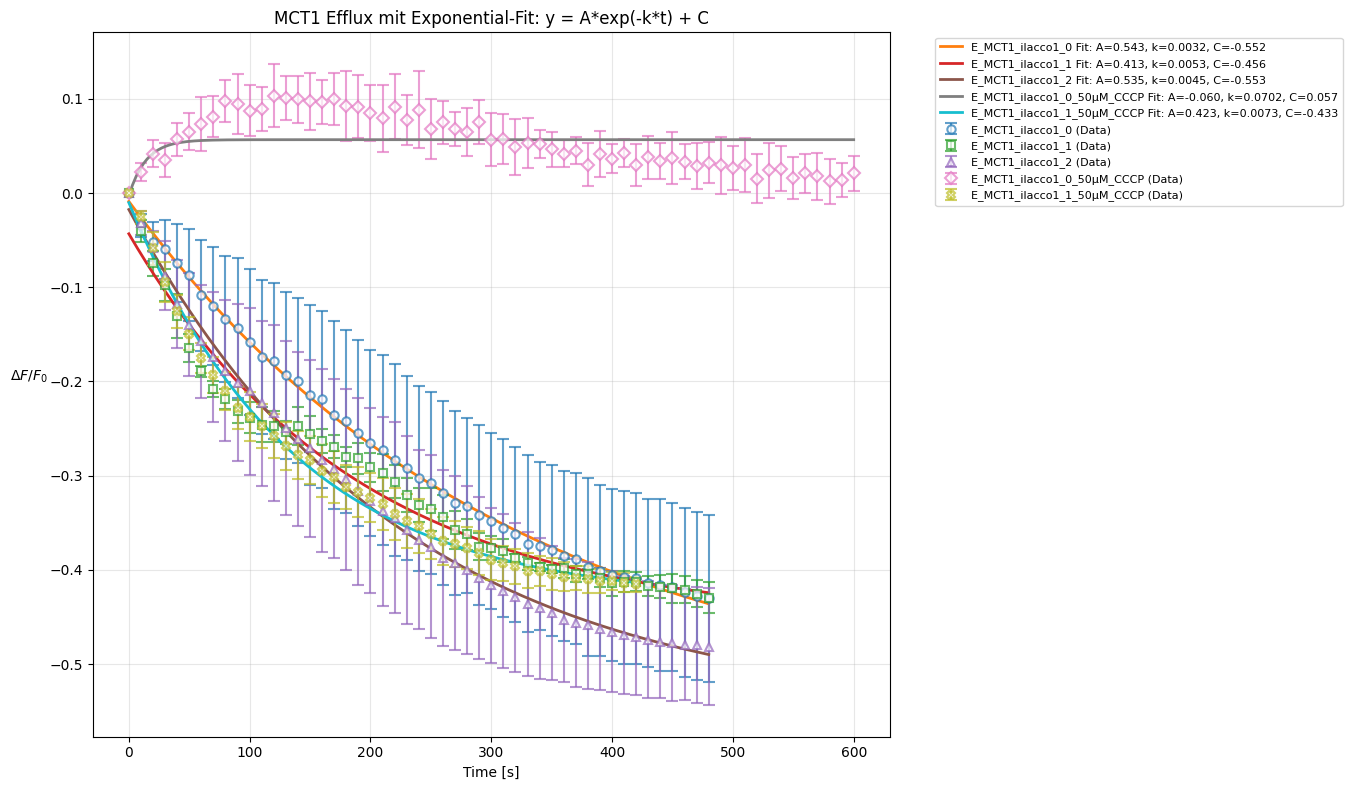

In [9]:
# Fit der Daten mit exponentieller Funktion: y = A*exp(-k*t) + C
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definiere die Fit-Funktion
def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_0_50μM_CCCP",'D', E_MCT1_ilacco1_0_50μM_CCCP),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

plt.figure(figsize=(14, 8))

for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    stds = df["Standardabweichung"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Plotte Originaldaten
    plt.errorbar(times_clean, means_clean, yerr=stds_clean, 
                marker=marker, linestyle='', label=f'{name} (Data)', capsize=4, 
                markerfacecolor='white', markeredgewidth=1.5, markersize=6, alpha=0.7)
    
    # Führe Fit durch
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Erstelle geglättete Kurve für Fit
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
        y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
        
        # Plotte Fit
        plt.plot(t_fit, y_fit, '-', linewidth=2, 
                label=f'{name} Fit: A={A_fit:.3f}, k={k_fit:.4f}, C={C_fit:.3f}')
        
        print(f'{name}:')
        print(f'  A = {A_fit:.4f} ± {np.sqrt(pcov[0,0]):.4f}')
        print(f'  k = {k_fit:.4f} ± {np.sqrt(pcov[1,1]):.4f}')
        print(f'  C = {C_fit:.4f} ± {np.sqrt(pcov[2,2]):.4f}')
        print()
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
plt.title("MCT1 Efflux mit Exponential-Fit: y = A*exp(-k*t) + C")
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'Efflux_exponential_fit.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()

Saved plot: ../figueres/Efflux_individual_fits.png


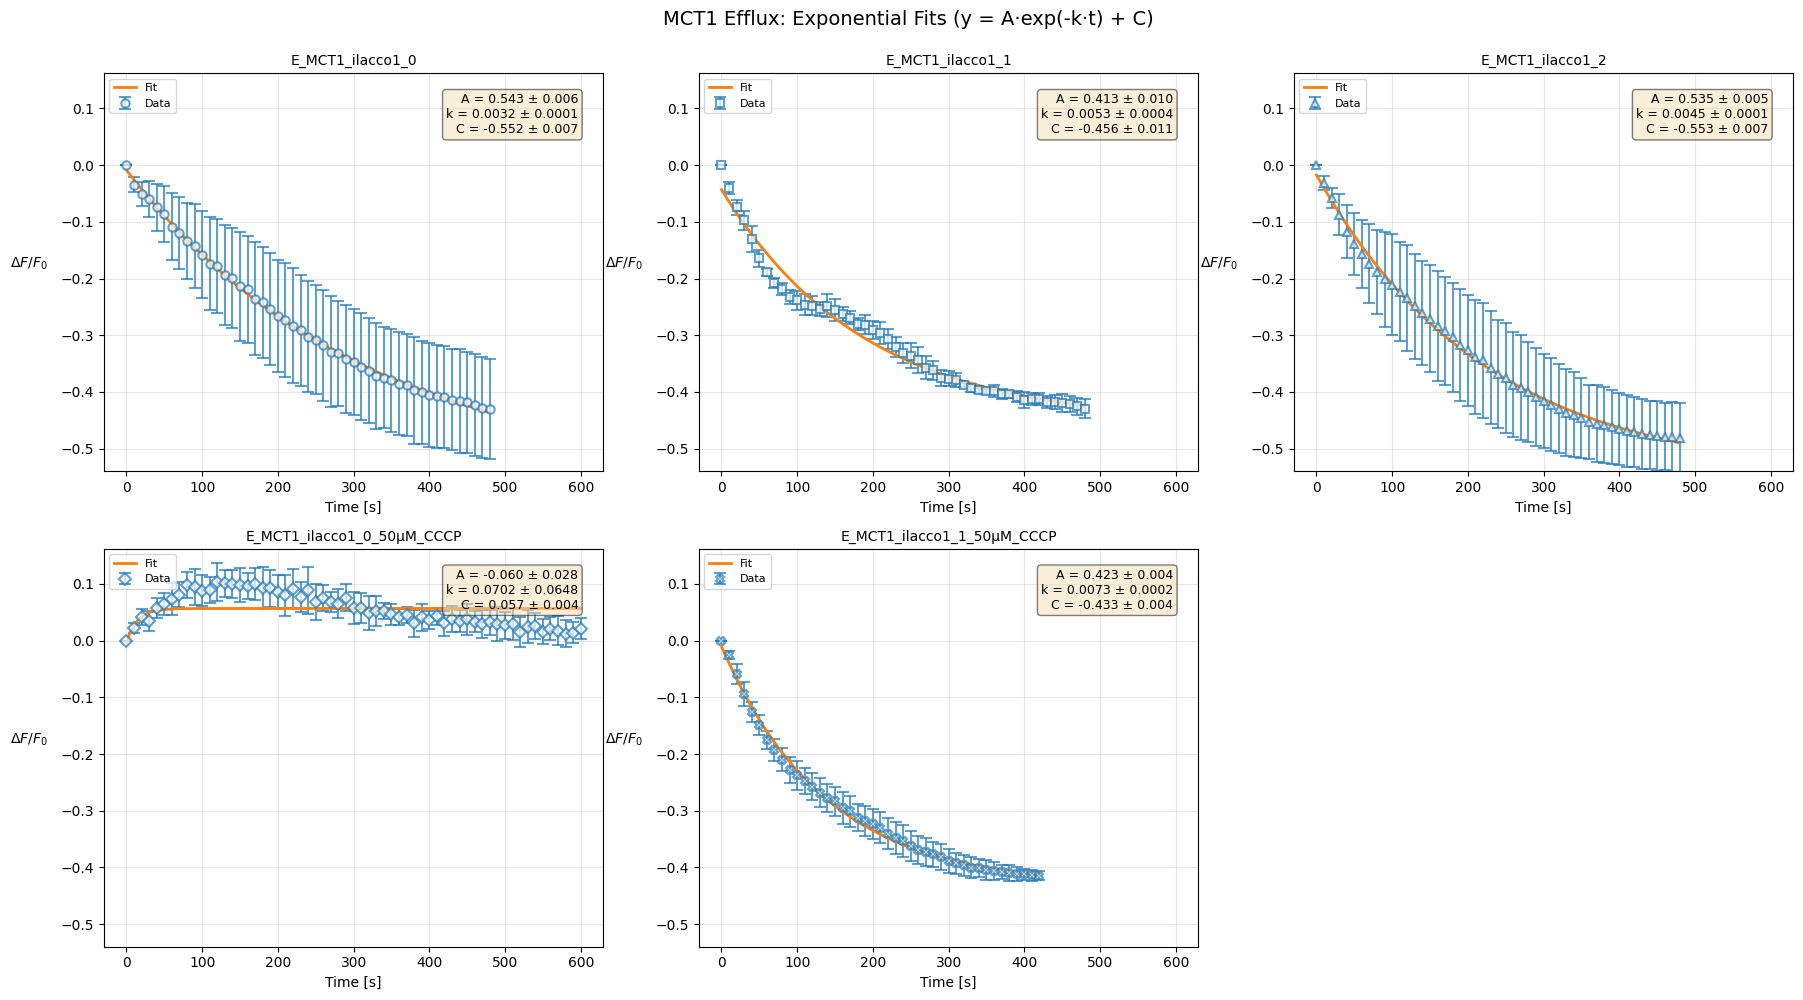

In [10]:
# Einzelne Plots mit Fits in Subplot-Figur
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definiere die Fit-Funktion
def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_0_50μM_CCCP",'D', E_MCT1_ilacco1_0_50μM_CCCP),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

# Erstelle Subplot-Grid (3x2 für 5 Plots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames):
    ax = axes[idx]
    
    times = df["Time"].values
    means = df["Mittelwerte"].values
    stds = df["Standardabweichung"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Sammle für uniforme Skalierung
    all_times.extend(times_clean)
    all_values.extend(means_clean)
    
    # Plotte Originaldaten
    ax.errorbar(times_clean, means_clean, yerr=stds_clean, 
                marker=marker, linestyle='', label='Data', capsize=4, 
                markerfacecolor='white', markeredgewidth=1.5, markersize=6, 
                alpha=0.7, color='C0')
    
    # Führe Fit durch
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Erstelle geglättete Kurve für Fit
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 200)
        y_fit = exp_decay(t_fit, A_fit, k_fit, C_fit)
        
        # Plotte Fit
        ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Fit')
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        C_err = np.sqrt(pcov[2,2])
        
        # Füge Fit-Parameter mit Unsicherheiten als Text hinzu
        textstr = f'A = {A_fit:.3f} ± {A_err:.3f}\nk = {k_fit:.4f} ± {k_err:.4f}\nC = {C_fit:.3f} ± {C_err:.3f}'
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Fit fehlgeschlagen:\n{str(e)[:50]}', 
                transform=ax.transAxes, ha='center', va='center', fontsize=8)
    
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', fontsize=8)

# Letzte leere Subplot ausblenden
axes[-1].axis('off')

# Berechne und setze uniforme Achsenskalierung
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes[:-1]:  # Nicht die letzte (ausgeblendete)
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.suptitle('MCT1 Efflux: Exponential Fits (y = A·exp(-k·t) + C)', fontsize=14, y=0.995)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'Efflux_individual_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()

Saved parameter comparison: ../figueres/Efflux_parameter_comparison.png


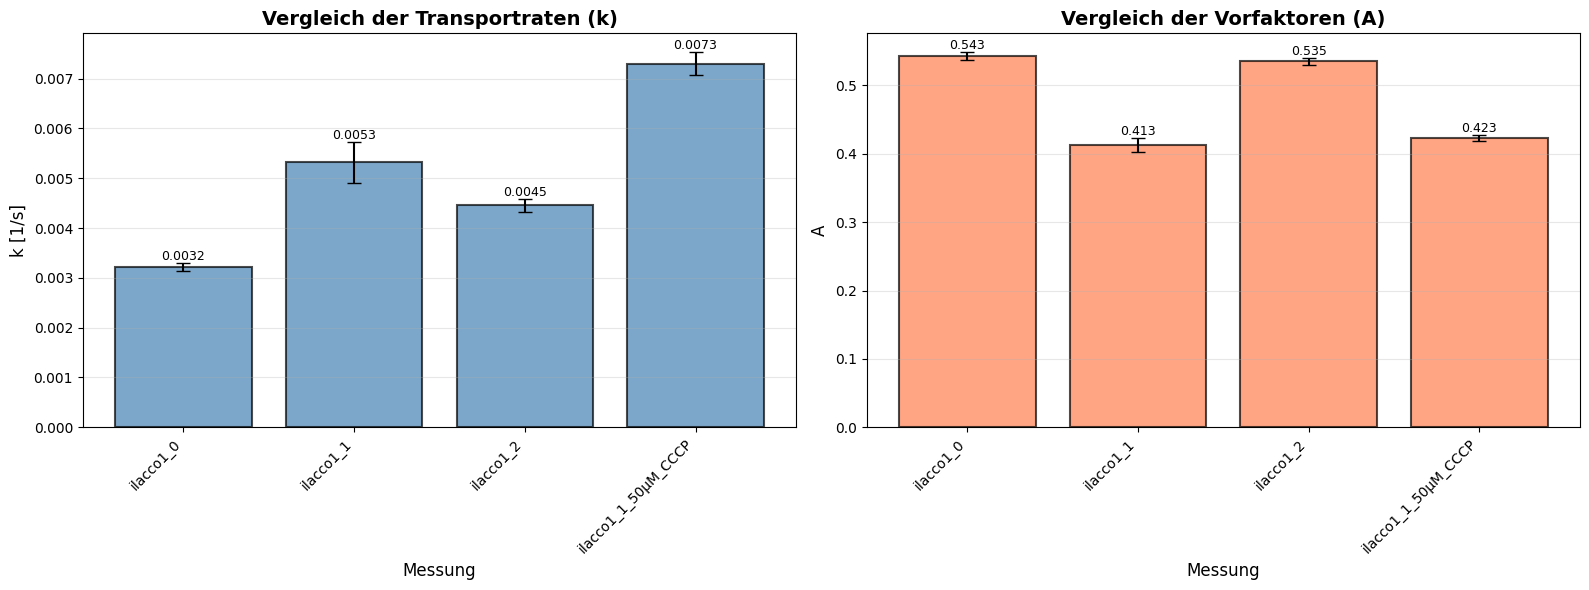


=== Fit-Parameter Zusammenfassung ===
Messung                        k [1/s]         A              
------------------------------------------------------------
ilacco1_0                      0.0032±0.0001   0.543±0.006
ilacco1_1                      0.0053±0.0004   0.413±0.010
ilacco1_2                      0.0045±0.0001   0.535±0.005
ilacco1_1_50μM_CCCP            0.0073±0.0002   0.423±0.004


In [11]:
# Histogramme für Fit-Parameter: k (Transportrate) und A (Vorfaktor)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

# Listen für Parameter und Unsicherheiten
names = []
k_values = []
k_errors = []
A_values = []
A_errors = []

# Führe Fits durch und sammle Parameter
for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        
        # Speichere Werte
        names.append(name.replace('E_MCT1_', ''))
        k_values.append(k_fit)
        k_errors.append(k_err)
        A_values.append(A_fit)
        A_errors.append(A_err)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle zwei Histogramme nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogramm 1: Transportrate k
x_pos = np.arange(len(names))
bars1 = ax1.bar(x_pos, k_values, yerr=k_errors, capsize=5, 
                color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Messung', fontsize=12)
ax1.set_ylabel('k [1/s]', fontsize=12)
ax1.set_title('Vergleich der Transportraten (k)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, k_val, k_err) in enumerate(zip(bars1, k_values, k_errors)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + k_err,
            f'{k_val:.4f}', ha='center', va='bottom', fontsize=9)

# Histogramm 2: Vorfaktor A
bars2 = ax2.bar(x_pos, A_values, yerr=A_errors, capsize=5,
                color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Messung', fontsize=12)
ax2.set_ylabel('A', fontsize=12)
ax2.set_title('Vergleich der Vorfaktoren (A)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(names, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, A_val, A_err) in enumerate(zip(bars2, A_values, A_errors)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
            f'{A_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'Efflux_parameter_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved parameter comparison: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Fit-Parameter Zusammenfassung ===')
print(f'{"Messung":<30} {"k [1/s]":<15} {"A":<15}')
print('-' * 60)
for name, k, k_e, A, A_e in zip(names, k_values, k_errors, A_values, A_errors):
    print(f'{name:<30} {k:.4f}±{k_e:.4f}   {A:.3f}±{A_e:.3f}')

In [ ]:
# initialer Fluss bei t0

Saved initial flux plot: ../figueres/MCT1_Efflux_initial_flux.png


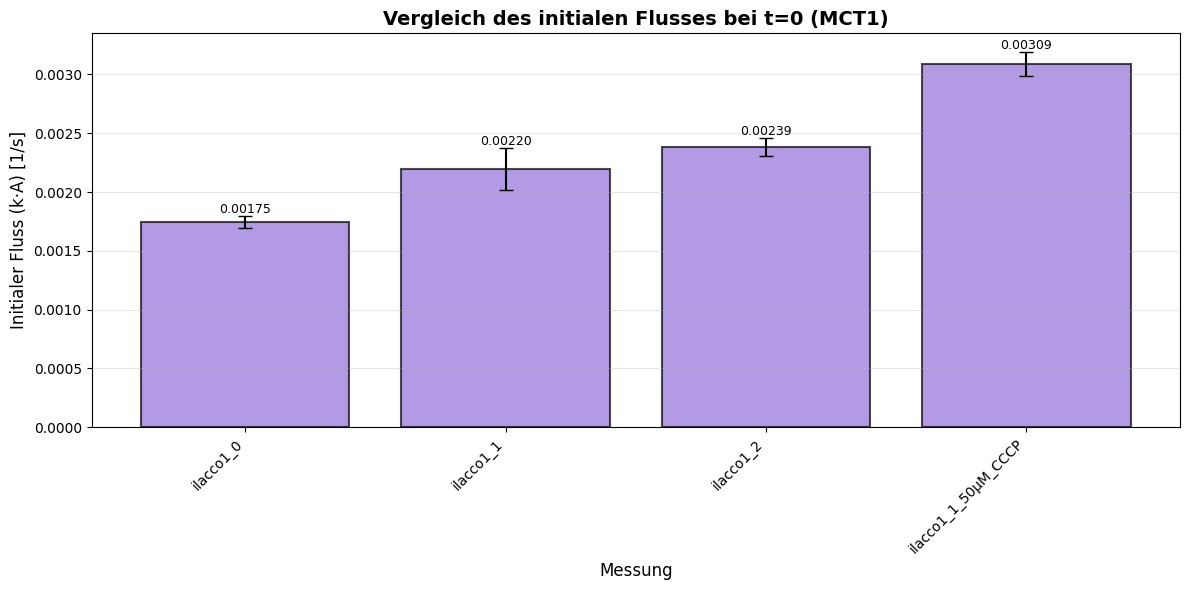


=== Initialer Fluss bei t=0 (Flux = k · A) ===
Messung                        k [1/s]            A                  Flux [1/s]        
------------------------------------------------------------------------------------------
ilacco1_0                      0.0032±0.0001    0.543±0.006    0.00175±0.00005
ilacco1_1                      0.0053±0.0004    0.413±0.010    0.00220±0.00018
ilacco1_2                      0.0045±0.0001    0.535±0.005    0.00239±0.00008
ilacco1_1_50μM_CCCP            0.0073±0.0002    0.423±0.004    0.00309±0.00010


In [14]:
# Berechnung des initialen Flusses bei t=0
# Initialer Fluss = k * A (aus y = A*exp(-k*t) + C)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_decay(t, A, k, C):
    """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
    return A * np.exp(-k * t) + C

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

# Listen für Parameter und initialen Fluss
names = []
k_values = []
k_errors = []
A_values = []
A_errors = []
flux_values = []
flux_errors = []

# Führe Fits durch und berechne initialen Fluss
for name, marker, df in data_frames:
    times = df["Time"].values
    means = df["Mittelwerte"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    
    try:
        # Startparameter schätzen
        A_guess = means_clean[0] - means_clean[-1]
        C_guess = means_clean[-1]
        k_guess = 0.01
        
        popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                              p0=[A_guess, k_guess, C_guess],
                              maxfev=10000)
        
        A_fit, k_fit, C_fit = popt
        
        # Berechne Unsicherheiten
        A_err = np.sqrt(pcov[0,0])
        k_err = np.sqrt(pcov[1,1])
        
        # Berechne initialen Fluss: Flux = k * A
        # Fehlerfortpflanzung: σ_flux = sqrt((k*σ_A)² + (A*σ_k)²)
        flux = k_fit * A_fit
        flux_err = np.sqrt((k_fit * A_err)**2 + (A_fit * k_err)**2)
        
        # Speichere Werte
        names.append(name.replace('E_MCT1_', ''))
        k_values.append(k_fit)
        k_errors.append(k_err)
        A_values.append(A_fit)
        A_errors.append(A_err)
        flux_values.append(flux)
        flux_errors.append(flux_err)
        
    except Exception as e:
        print(f'Fit für {name} fehlgeschlagen: {e}')

# Erstelle Histogramm für initialen Fluss
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(names))
bars = ax.bar(x_pos, flux_values, yerr=flux_errors, capsize=5, 
              color='mediumpurple', edgecolor='black', linewidth=1.5, alpha=0.7)
ax.set_xlabel('Messung', fontsize=12)
ax.set_ylabel('Initialer Fluss (k·A) [1/s]', fontsize=12)
ax.set_title('Vergleich des initialen Flusses bei t=0 (MCT1)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Füge Werte über den Balken hinzu
for i, (bar, flux_val, flux_err) in enumerate(zip(bars, flux_values, flux_errors)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + flux_err,
            f'{flux_val:.5f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

outpath = os.path.join('..', 'figueres', 'MCT1_Efflux_initial_flux.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved initial flux plot: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n=== Initialer Fluss bei t=0 (Flux = k · A) ===')
print(f'{"Messung":<30} {"k [1/s]":<18} {"A":<18} {"Flux [1/s]":<18}')
print('-' * 90)
for name, k, k_e, A, A_e, flux, flux_e in zip(names, k_values, k_errors, A_values, A_errors, flux_values, flux_errors):
    print(f'{name:<30} {k:.4f}±{k_e:.4f}    {A:.3f}±{A_e:.3f}    {flux:.5f}±{flux_e:.5f}')


In [16]:
# Funktion 1: Exponentieller Fit der Daten
def fit_exponential_decay(data_frames):
    """
    Fittet Daten mit exponentieller Zerfallsfunktion: y = A*exp(-k*t) + C
    
    Parameters:
    -----------
    data_frames : list of tuples
        Liste mit (name, marker, dataframe) für jede Messung
        
    Returns:
    --------
    results : dict
        Dictionary mit Namen als Keys und dict mit Fit-Parametern als Values
        Format: {'name': {'A': val, 'A_err': err, 'k': val, 'k_err': err, 
                         'C': val, 'C_err': err, 'flux': val, 'flux_err': err,
                         'times': array, 'means': array, 'stds': array}}
    """
    from scipy.optimize import curve_fit
    
    def exp_decay(t, A, k, C):
        """Exponentielle Zerfallsfunktion: y = A*exp(-k*t) + C"""
        return A * np.exp(-k * t) + C
    
    results = {}
    
    for name, marker, df in data_frames:
        times = df["Time"].values
        means = df["Mittelwerte"].values
        stds = df["Standardabweichung"].values
        
        # Entferne NaN-Werte
        mask = ~(np.isnan(times) | np.isnan(means))
        times_clean = times[mask]
        means_clean = means[mask]
        stds_clean = stds[mask]
        
        try:
            # Startparameter schätzen
            A_guess = means_clean[0] - means_clean[-1]
            C_guess = means_clean[-1]
            k_guess = 0.01
            
            popt, pcov = curve_fit(exp_decay, times_clean, means_clean, 
                                  p0=[A_guess, k_guess, C_guess],
                                  maxfev=10000)
            
            A_fit, k_fit, C_fit = popt
            
            # Berechne Unsicherheiten
            A_err = np.sqrt(pcov[0,0])
            k_err = np.sqrt(pcov[1,1])
            C_err = np.sqrt(pcov[2,2])
            
            # Berechne initialen Fluss: Flux = k * A
            flux = k_fit * A_fit
            flux_err = np.sqrt((k_fit * A_err)**2 + (A_fit * k_err)**2)
            
            # Speichere Ergebnisse
            results[name] = {
                'A': A_fit,
                'A_err': A_err,
                'k': k_fit,
                'k_err': k_err,
                'C': C_fit,
                'C_err': C_err,
                'flux': flux,
                'flux_err': flux_err,
                'times': times_clean,
                'means': means_clean,
                'stds': stds_clean,
                'marker': marker
            }
            
        except Exception as e:
            print(f'Fit für {name} fehlgeschlagen: {e}')
            results[name] = None
    
    return results


# Funktion 2: Plot mit Daten und Fit erstellen
def plot_data_with_fits(results, title='Exponential Fits', save_path=None, uniform_axes=True):
    """
    Erstellt Subplot-Grid mit Daten und Fits
    
    Parameters:
    -----------
    results : dict
        Dictionary aus fit_exponential_decay()
    title : str
        Titel für die gesamte Figur
    save_path : str, optional
        Pfad zum Speichern der Figur
    uniform_axes : bool
        Ob alle Subplots gleiche Achsenskalierung haben sollen
        
    Returns:
    --------
    fig, axes : matplotlib Figure und Axes
    """
    def exp_decay(t, A, k, C):
        return A * np.exp(-k * t) + C
    
    n = len(results)
    cols = 3
    rows = (n + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 5*rows))
    if n == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Sammle Daten für uniforme Skalierung
    all_times = []
    all_values = []
    
    for idx, (name, data) in enumerate(results.items()):
        if idx >= len(axes):
            break
            
        ax = axes[idx]
        
        if data is None:
            ax.text(0.5, 0.5, f'{name}\nFit fehlgeschlagen', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(name, fontsize=10)
            continue
        
        times = data['times']
        means = data['means']
        stds = data['stds']
        marker = data['marker']
        
        all_times.extend(times)
        all_values.extend(means)
        
        # Plotte Originaldaten
        ax.errorbar(times, means, yerr=stds, 
                   marker=marker, linestyle='', label='Data', capsize=4, 
                   markerfacecolor='white', markeredgewidth=1.5, markersize=6, 
                   alpha=0.7, color='C0')
        
        # Plotte Fit
        t_fit = np.linspace(times.min(), times.max(), 200)
        y_fit = exp_decay(t_fit, data['A'], data['k'], data['C'])
        ax.plot(t_fit, y_fit, '-', linewidth=2, color='C1', label='Fit')
        
        # Füge Parameter als Text hinzu
        textstr = f"A = {data['A']:.3f} ± {data['A_err']:.3f}\n"
        textstr += f"k = {data['k']:.4f} ± {data['k_err']:.4f}\n"
        textstr += f"C = {data['C']:.3f} ± {data['C_err']:.3f}"
        ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
               fontsize=8, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        ax.set_title(name, fontsize=10)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
        ax.yaxis.set_label_coords(-0.15, 0.5)
        ax.grid(alpha=0.3)
        ax.legend(loc='upper left', fontsize=8)
    
    # Verstecke überschüssige Subplots
    for idx in range(len(results), len(axes)):
        axes[idx].axis('off')
    
    # Setze uniforme Achsenskalierung
    if uniform_axes and all_times and all_values:
        x_min, x_max = min(all_times), max(all_times)
        y_min, y_max = min(all_values), max(all_values)
        x_margin = (x_max - x_min) * 0.05
        y_margin = (y_max - y_min) * 0.1
        
        for idx in range(len(results)):
            axes[idx].set_xlim(x_min - x_margin, x_max + x_margin)
            axes[idx].set_ylim(y_min - y_margin, y_max + y_margin)
    
    plt.suptitle(title, fontsize=14, y=0.995)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f'Saved plot: {save_path}')
    
    return fig, axes


# Funktion 3: Histogramme für Parameter-Vergleich
def plot_parameter_histograms(results, save_path=None, figsize=(20, 6)):
    """
    Erstellt drei Histogramme: k, A und Flux (k*A)
    
    Parameters:
    -----------
    results : dict
        Dictionary aus fit_exponential_decay()
    save_path : str, optional
        Pfad zum Speichern der Figur
    figsize : tuple
        Größe der Figur (width, height)
        
    Returns:
    --------
    fig, axes : matplotlib Figure und Axes
    """
    # Extrahiere Daten
    names = []
    k_values = []
    k_errors = []
    A_values = []
    A_errors = []
    flux_values = []
    flux_errors = []
    
    for name, data in results.items():
        if data is None:
            continue
        names.append(name)
        k_values.append(data['k'])
        k_errors.append(data['k_err'])
        A_values.append(data['A'])
        A_errors.append(data['A_err'])
        flux_values.append(data['flux'])
        flux_errors.append(data['flux_err'])
    
    # Erstelle drei Histogramme
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    
    x_pos = np.arange(len(names))
    
    # Histogramm 1: Transportrate k
    bars1 = ax1.bar(x_pos, k_values, yerr=k_errors, capsize=5, 
                   color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.7)
    ax1.set_xlabel('Messung', fontsize=12)
    ax1.set_ylabel('k [1/s]', fontsize=12)
    ax1.set_title('Transportrate (k)', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
    ax1.grid(axis='y', alpha=0.3)
    
    for i, (bar, k_val, k_err) in enumerate(zip(bars1, k_values, k_errors)):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + k_err,
                f'{k_val:.4f}', ha='center', va='bottom', fontsize=8)
    
    # Histogramm 2: Vorfaktor A
    bars2 = ax2.bar(x_pos, A_values, yerr=A_errors, capsize=5,
                   color='coral', edgecolor='black', linewidth=1.5, alpha=0.7)
    ax2.set_xlabel('Messung', fontsize=12)
    ax2.set_ylabel('A', fontsize=12)
    ax2.set_title('Amplitude (A)', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
    ax2.grid(axis='y', alpha=0.3)
    
    for i, (bar, A_val, A_err) in enumerate(zip(bars2, A_values, A_errors)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + A_err,
                f'{A_val:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Histogramm 3: Initialer Fluss
    bars3 = ax3.bar(x_pos, flux_values, yerr=flux_errors, capsize=5,
                   color='mediumpurple', edgecolor='black', linewidth=1.5, alpha=0.7)
    ax3.set_xlabel('Messung', fontsize=12)
    ax3.set_ylabel('Flux (k·A) [1/s]', fontsize=12)
    ax3.set_title('Initialer Fluss (k·A)', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
    ax3.grid(axis='y', alpha=0.3)
    
    for i, (bar, flux_val, flux_err) in enumerate(zip(bars3, flux_values, flux_errors)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + flux_err,
                f'{flux_val:.5f}', ha='center', va='bottom', fontsize=7)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f'Saved parameter histograms: {save_path}')
    
    # Drucke Zusammenfassung
    print('\n=== Parameter-Zusammenfassung ===')
    print(f'{"Messung":<30} {"k [1/s]":<18} {"A":<18} {"Flux [1/s]":<18}')
    print('-' * 90)
    for name, k, k_e, A, A_e, flux, flux_e in zip(names, k_values, k_errors, 
                                                    A_values, A_errors, 
                                                    flux_values, flux_errors):
        print(f'{name:<30} {k:.4f}±{k_e:.4f}    {A:.3f}±{A_e:.3f}    {flux:.5f}±{flux_e:.5f}')
    
    return fig, (ax1, ax2, ax3)


print("Funktionen erfolgreich definiert:")
print("1. fit_exponential_decay(data_frames)")
print("2. plot_data_with_fits(results, title, save_path, uniform_axes)")
print("3. plot_parameter_histograms(results, save_path, figsize)")


Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)


Saved plot: ../figueres/MCT1_function_fits.png


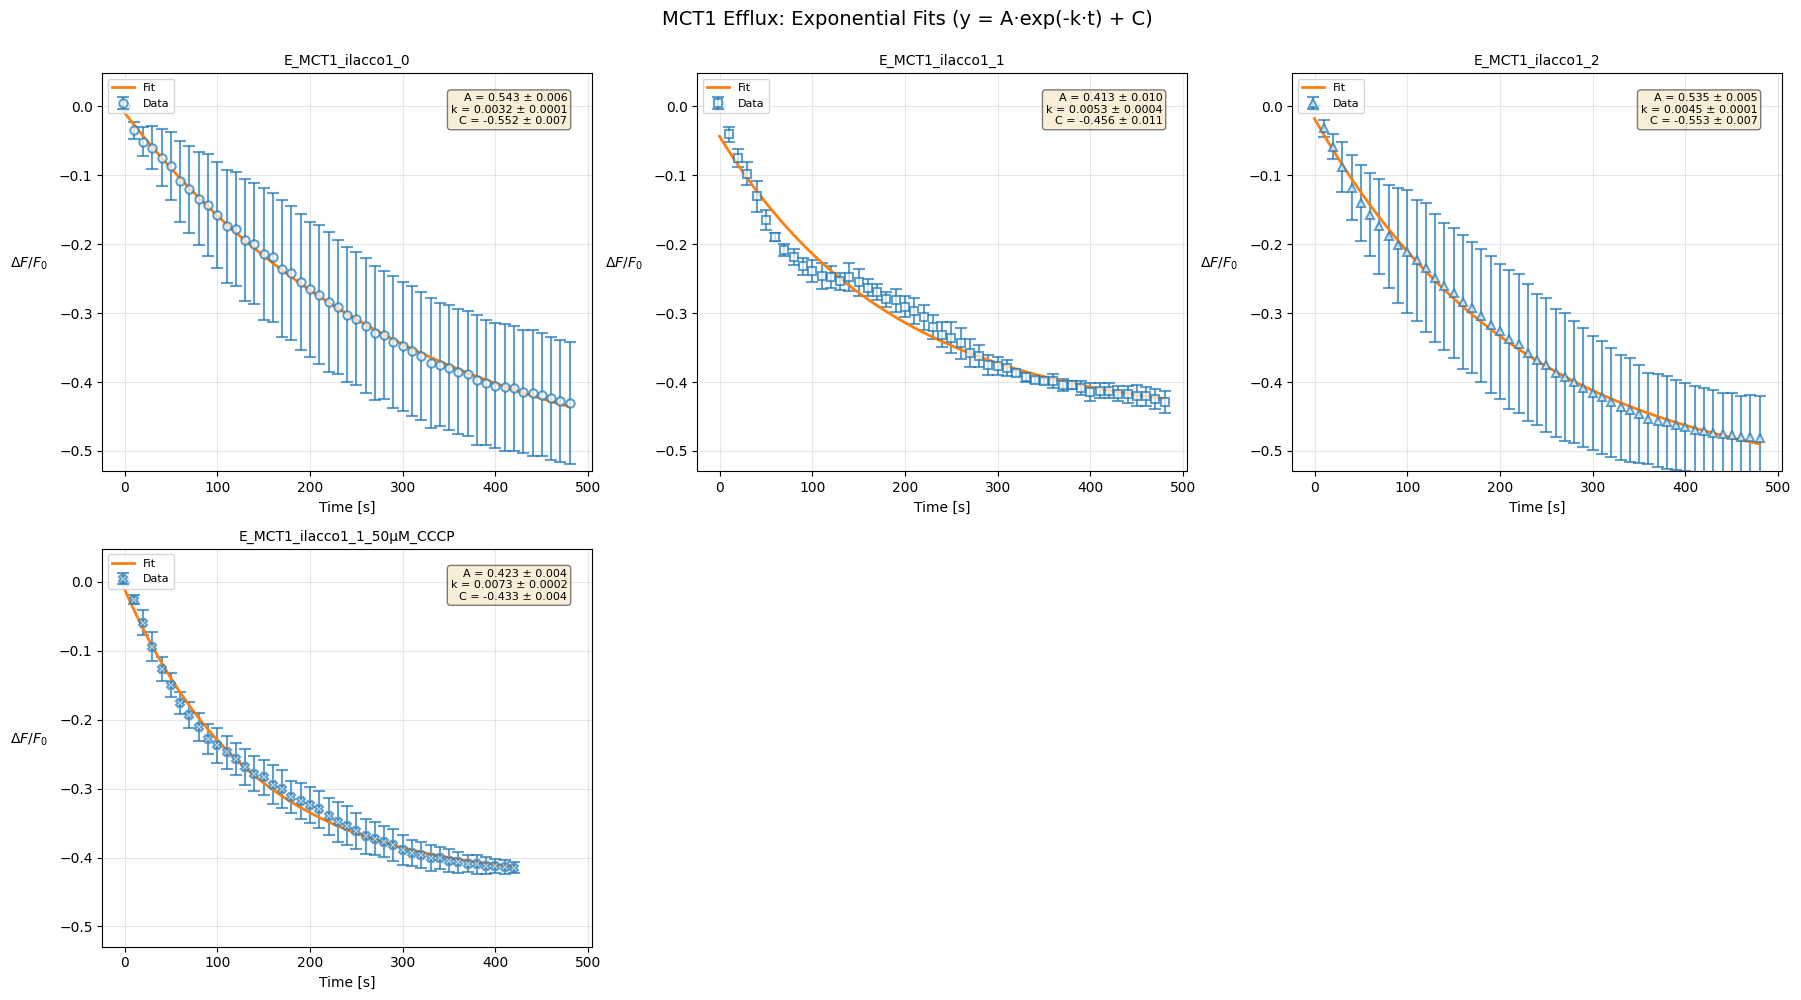

Saved parameter histograms: ../figueres/MCT1_function_parameters.png

=== Parameter-Zusammenfassung ===
Messung                        k [1/s]            A                  Flux [1/s]        
------------------------------------------------------------------------------------------
E_MCT1_ilacco1_0               0.0032±0.0001    0.543±0.006    0.00175±0.00005
E_MCT1_ilacco1_1               0.0053±0.0004    0.413±0.010    0.00220±0.00018
E_MCT1_ilacco1_2               0.0045±0.0001    0.535±0.005    0.00239±0.00008
E_MCT1_ilacco1_1_50μM_CCCP     0.0073±0.0002    0.423±0.004    0.00309±0.00010


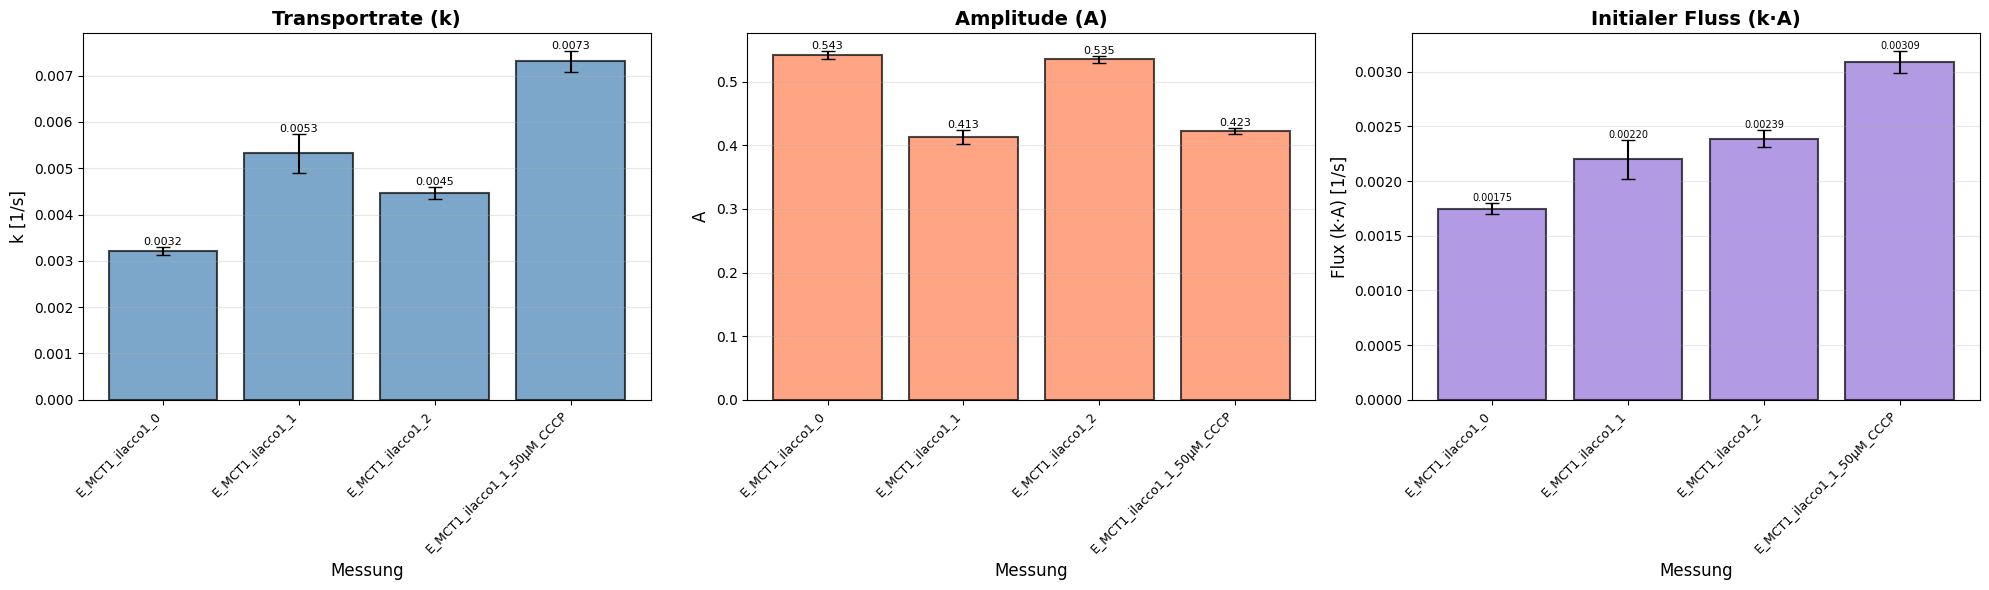

In [17]:
# Beispiel: Verwendung der drei Funktionen
# Definiere die Daten
data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

# 1. Führe Fits durch
fit_results = fit_exponential_decay(data_frames)

# 2. Erstelle Plot mit Daten und Fits
fig1, axes1 = plot_data_with_fits(
    fit_results, 
    title='MCT1 Efflux: Exponential Fits (y = A·exp(-k·t) + C)',
    save_path=os.path.join('..', 'figueres', 'MCT1_function_fits.png'),
    uniform_axes=True
)
plt.show()

# 3. Erstelle Histogramme für Parameter-Vergleich
fig2, axes2 = plot_parameter_histograms(
    fit_results,
    save_path=os.path.join('..', 'figueres', 'MCT1_function_parameters.png'),
    figsize=(20, 6)
)
plt.show()
